In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/AnkeethaJha-99/HH/master/Python/MachineLearning/Decision_Tree/tennis.csv.txt')

In [8]:
data


,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [10]:
data.describe(include='all').T

,count,unique,top,freq
outlook,14,3,sunny,5
temp,14,3,mild,6
humidity,14,2,high,7
windy,14,2,False,8
play,14,2,yes,9


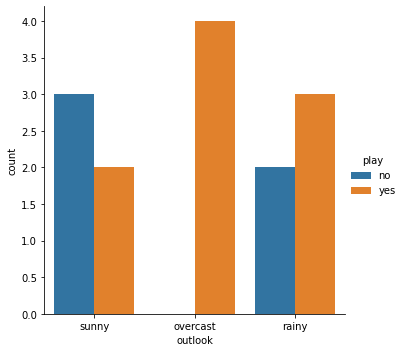

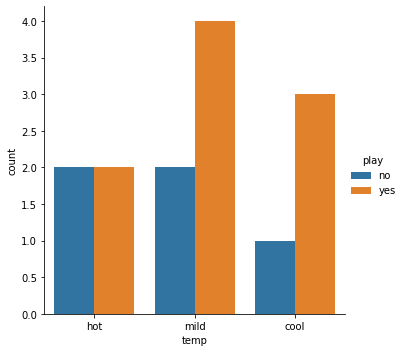

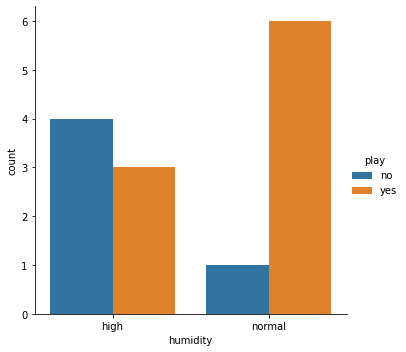

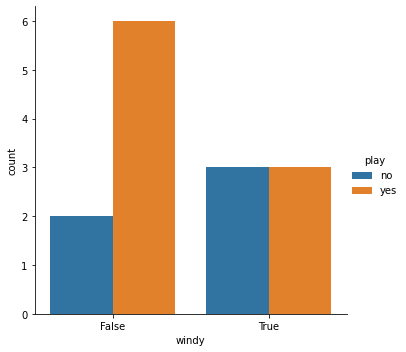

In [27]:
features = data.columns
#plot countplot for all features 

for i in features:
    if i !='play':
        sns.catplot(data=data,x= i,kind='count',hue='play')

outlook : tend to play always when outlook is overcast
temp: tend to play when temp is mild
humidity: tend to play when humidity is normal
windy: tend to play when it is not windy

In [42]:
x=pd.DataFrame(data.drop("play",axis=1)) #independents
y= pd.DataFrame(data["play"]) #dependent

y.dtypes

play    object
dtype: object

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [43]:
x_train.shape
x_train.dtypes

outlook     object
temp        object
humidity    object
windy         bool
dtype: object

In [39]:
#fit the model
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [45]:
#get dummies
data_dummy = pd.get_dummies(x)
data_dummy

,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
0,False,0,0,1,0,1,0,1,0
1,True,0,0,1,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,1,0,0,0,1,1,0
4,False,0,1,0,1,0,0,0,1
5,True,0,1,0,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,0,1,0,0,1,1,0
8,False,0,0,1,1,0,0,0,1
9,False,0,1,0,0,0,1,0,1


In [47]:
x_train,x_test,y_train,y_test = train_test_split(data_dummy,y,test_size=0.2,random_state=1)
x_train


,windy,outlook_overcast,outlook_rainy,outlook_sunny,temp_cool,temp_hot,temp_mild,humidity_high,humidity_normal
2,False,1,0,0,0,1,0,1,0
10,True,0,0,1,0,0,1,0,1
4,False,0,1,0,1,0,0,0,1
1,True,0,0,1,0,1,0,1,0
12,False,1,0,0,0,1,0,0,1
0,False,0,0,1,0,1,0,1,0
13,True,0,1,0,0,0,1,1,0
9,False,0,1,0,0,0,1,0,1
8,False,0,0,1,1,0,0,0,1
11,True,1,0,0,0,0,1,1,0


In [48]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'X[1] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]\nclass = no'),
 Text(0.3333333333333333, 0.7, 'X[8] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = no'),
 Text(0.16666666666666666, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no'),
 Text(0.5, 0.5, 'X[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = no'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = no'),
 Text(0.6666666666666666, 0.3, 'X[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = no'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no'),
 Text(0.8333333333333334, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no'),
 Text(0.6666666666666666, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = no')]

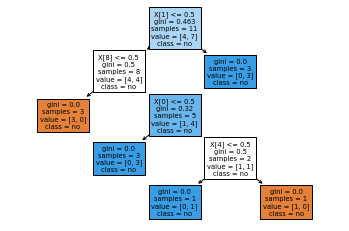

In [64]:
from sklearn.tree import plot_tree
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anyw
plot_tree(clf,filled=True,class_names =data.play)

In [80]:
y_pred = pd.DataFrame(clf.predict(x_test),columns=['play'])
y_pred

,play
0,no
1,no
2,yes


In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.6666666666666666

In [71]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [89]:
y_test.index = [0,1,2]
y_test

,play
0,yes
1,no
2,yes


In [93]:
compare = pd.DataFrame({'actually':y_test['play'],'predicted':y_pred['play']},index=[0,1,2])

compare

,actually,predicted
0,yes,no
1,no,no
2,yes,yes
